# Merging Ordered Data

Ordered data seems to generally mean there's a date or year column. 

`pd.merge_ordered()` is discussed and compared to `pd.merge()`. Some
differences:

* `pd.merge_ordered` default for `how` param is "outer".
* `pd.merge_ordered` must be called from the pandas module, not pd.DataFrame.
* The resulting DataFrame will be sorted on the key.
* `fill_method` parameter takes "ffill" value to forward fill any missing
values. 
* The order of the sort when joining on multiple keys is important.



In [32]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


In [33]:
taxis = sns.load_dataset("taxis")
seaice = sns.load_dataset("seaice")
# ensure that columns are formatted the same
taxis["dropoff"] = taxis["dropoff"].dt.strftime("%Y-%m-%d")
seaice["Date"] = seaice["Date"].dt.strftime("%Y-%m-%d")

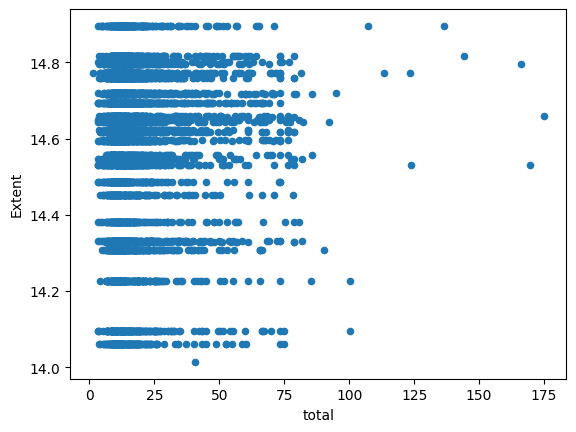

In [41]:
taxis_seaice = pd.merge_ordered(
    taxis, seaice, left_on="dropoff", right_on="Date", how="inner")
taxis_seaice.plot(x="total", y="Extent", kind="scatter")
plt.show()
# nothing much to say about the plot, other than it's probably a bad idea!
# but the ability to merge on a date column and have it sorted for you is nice
# though it needed a bit more prep in coercing columns than was obvious from
# the course.
